In [1]:
# This notebook uses IEX's sandbox environment with unlimited monthly queries.

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [3]:
import os
import requests

In [4]:
import env

credentials loaded successfully


In [5]:
import pyEX as p 

In [6]:
c = p.Client(api_token = env.token, version = 'stable')

In [7]:
import iexfinance as iex

In [8]:
os.environ['IEX_API_VERSION'] = 'iexcloud-sandbox'

In [9]:
os.environ['IEX_TOKEN'] = env.sandbox_token

In [10]:
from iexfinance.stocks import get_historical_data

In [11]:
start = datetime(2017, 1, 1)
end = datetime(2020, 12, 31)

In [12]:
spy = get_historical_data("SPY", start, end, output_format = 'pandas')

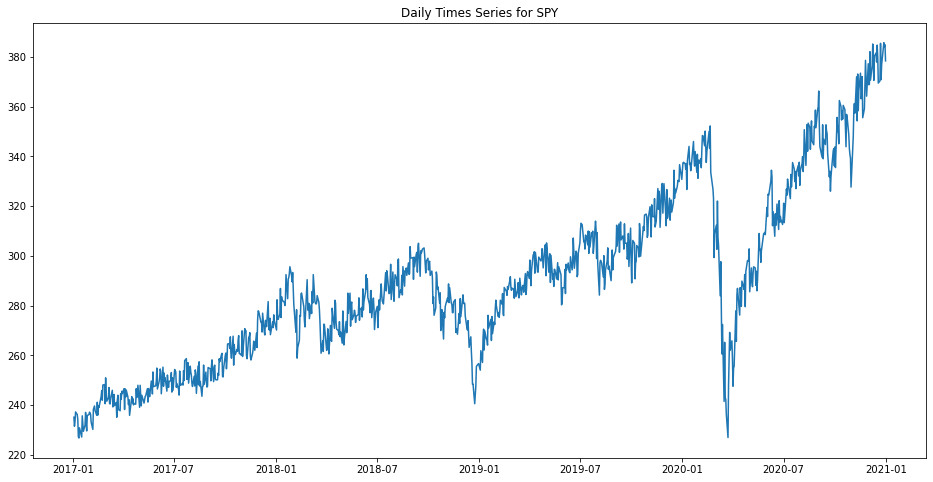

In [13]:
plt.figure(figsize = (16, 8))
plt.plot(spy.index, spy['close'])
plt.title("Daily Times Series for SPY")
plt.show()

In [14]:
tsla = get_historical_data("TSLA", start, end, output_format = 'pandas')

In [15]:
tsla

,open,high,low,close,volume
date,,,,,
2017-01-03,44.839,45.470,43.4310,44.279,29867131
2017-01-04,43.350,47.000,43.8740,47.019,57667178
2017-01-05,45.955,46.598,45.9000,46.900,29613130
2017-01-06,45.404,47.308,45.5300,46.795,28425258
2017-01-09,46.513,48.554,47.2000,47.258,20552912
...,...,...,...,...,...
2020-12-24,660.140,667.210,648.0000,677.440,23534847
2020-12-28,705.090,689.000,685.3000,680.390,33241025
2020-12-29,677.000,701.800,686.0000,697.020,23775175


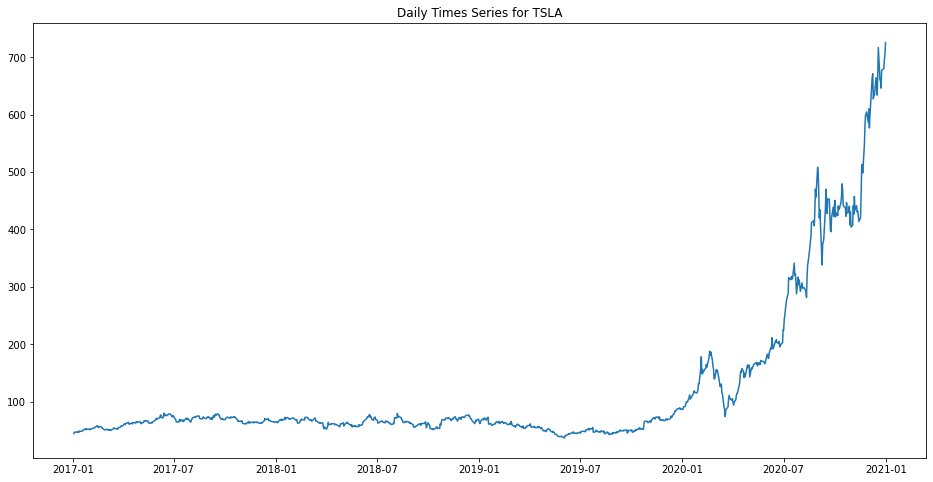

In [16]:
plt.figure(figsize = (16, 8))
plt.plot(tsla.index, tsla['close'])
plt.title("Daily Times Series for TSLA")
plt.show()

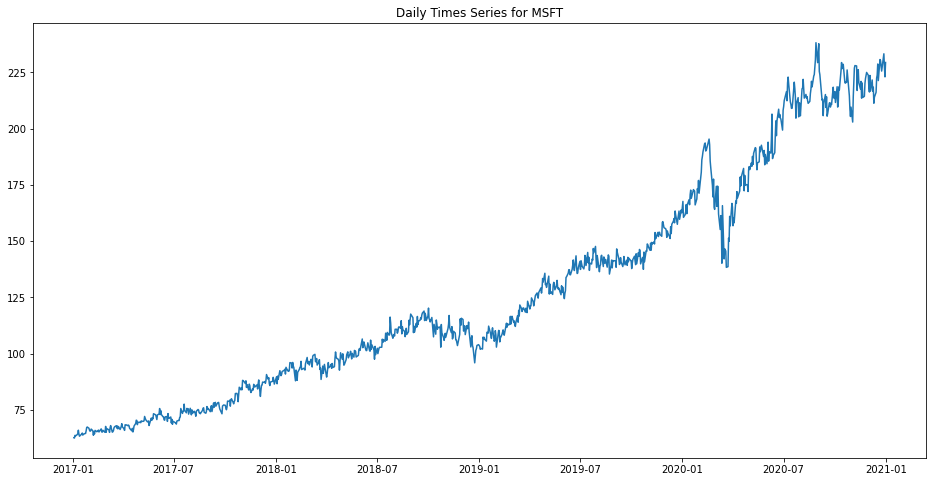

In [17]:
# Creating a function for this process:

msft = get_historical_data("MSFT", start, end, output_format = 'pandas')

plt.figure(figsize = (16, 8))
plt.plot(msft.index, msft['close'])
plt.title("Daily Times Series for MSFT")
plt.show()

In [18]:
def get_stock_chart(ticker, start_date, end_date, output_format = 'pandas'):
    
    '''This function will take the inputs from the user as to ticker, start date, end date, and default output format
    and return a chart with the requested stock/ticker.'''
    
    ticker = get_historical_data(str(ticker), start_date, end_date, output_format = 'pandas')
    plt.figure(figsize = (16, 8))
    plt.plot(ticker.index, ticker['close'])
    plt.title(f"Daily Times Series for {ticker}")
    plt.show()
    

In [19]:
start = datetime(2019, 1, 1)
end = datetime(2020, 12, 31)

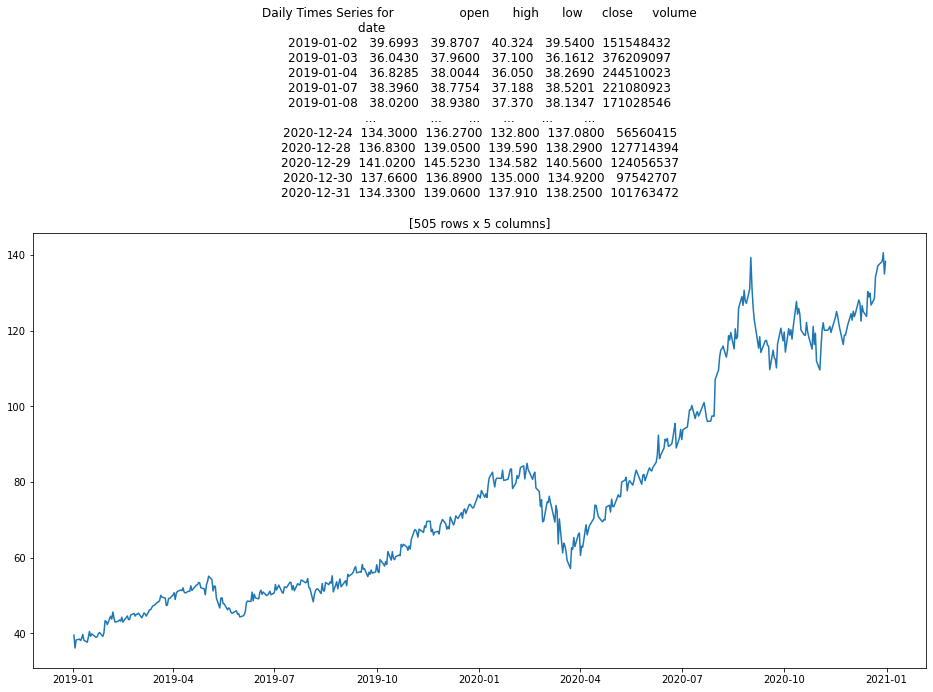

In [20]:
get_stock_chart("AAPL", start, end)

In [21]:
# Now adding user inputs:

In [22]:
# starting = datetime(input())